In [1]:
# Import pandas
import pandas as pd

# Read OSA_extreme_male.xlsx
df_OSA_male_extreme = pd.read_excel("C://Users/Asutos/Desktop/UPM/Python_analyse/Materials-20221102/OSA_extreme_male.xlsx")


In [2]:
# get a summary of the data
df_OSA_male_extreme.describe()

,IAH,Weight,Height,Age,Cervical,BMI
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,24.959928,92.417266,175.640288,47.543165,42.179856,29.908007
std,22.717228,18.591524,7.393047,12.222218,3.378103,5.452221
min,0.000000,61.000000,152.000000,22.000000,34.000000,20.619254
25%,4.800000,80.000000,170.000000,37.250000,40.000000,26.076872
50%,10.000000,89.000000,175.000000,47.000000,42.000000,29.005120
75%,40.875000,101.000000,180.000000,56.000000,44.000000,32.407407
max,102.000000,162.000000,197.000000,80.000000,53.000000,52.298554


In [3]:
df_OSA_male_extreme.head(10)

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA,BMI
0,P0005,hombre,9.0,80,173,32,40,Healthy,26.729927
1,P0006,hombre,2.0,109,190,32,42,Healthy,30.193906
2,P0007,hombre,34.0,86,169,39,42,Severe,30.110991
3,P0008,hombre,60.0,145,172,47,44,Severe,49.012980
4,P0013,hombre,3.7,90,180,36,40,Healthy,27.777778
5,P0020,hombre,4.3,89,171,44,45,Healthy,30.436716
6,P0022,hombre,56.0,113,177,33,46,Severe,36.068818
7,P0024,hombre,53.6,107,170,48,46,Severe,37.024221
8,P0025,hombre,2.1,70,174,53,38,Healthy,23.120624
9,P0027,hombre,47.0,100,180,62,48,Severe,30.864198


In [4]:
df_OSA_male_extreme

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA,BMI
0,P0005,hombre,9.0,80,173,32,40,Healthy,26.729927
1,P0006,hombre,2.0,109,190,32,42,Healthy,30.193906
2,P0007,hombre,34.0,86,169,39,42,Severe,30.110991
3,P0008,hombre,60.0,145,172,47,44,Severe,49.012980
4,P0013,hombre,3.7,90,180,36,40,Healthy,27.777778
...,...,...,...,...,...,...,...,...,...
273,P0668,hombre,41.5,113,180,44,44,Severe,34.876543
274,P0669,hombre,2.7,85,180,33,40,Healthy,26.234568
275,P0674,hombre,33.0,90,179,57,42,Severe,28.089011
276,P0679,hombre,9.2,105,180,35,45,Healthy,32.407407


In [5]:
df_OSA_male_extreme.describe()

,IAH,Weight,Height,Age,Cervical,BMI
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,24.959928,92.417266,175.640288,47.543165,42.179856,29.908007
std,22.717228,18.591524,7.393047,12.222218,3.378103,5.452221
min,0.000000,61.000000,152.000000,22.000000,34.000000,20.619254
25%,4.800000,80.000000,170.000000,37.250000,40.000000,26.076872
50%,10.000000,89.000000,175.000000,47.000000,42.000000,29.005120
75%,40.875000,101.000000,180.000000,56.000000,44.000000,32.407407
max,102.000000,162.000000,197.000000,80.000000,53.000000,52.298554


In [6]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'IAH'}>]], dtype=object)

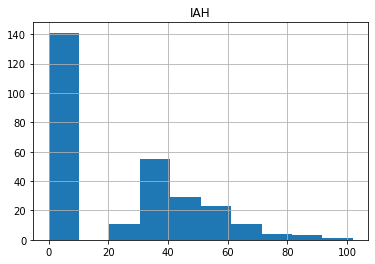

In [7]:
df_OSA_male_extreme.hist(column="IAH")

<AxesSubplot:xlabel='Age', ylabel='IAH'>

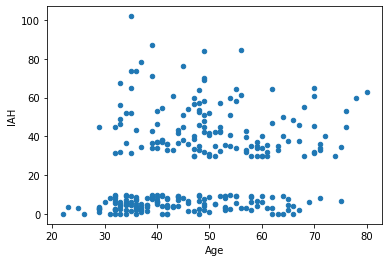

In [8]:
# scatter IAH as a function of Age
df_OSA_male_extreme.plot.scatter(x="Age",y="IAH")

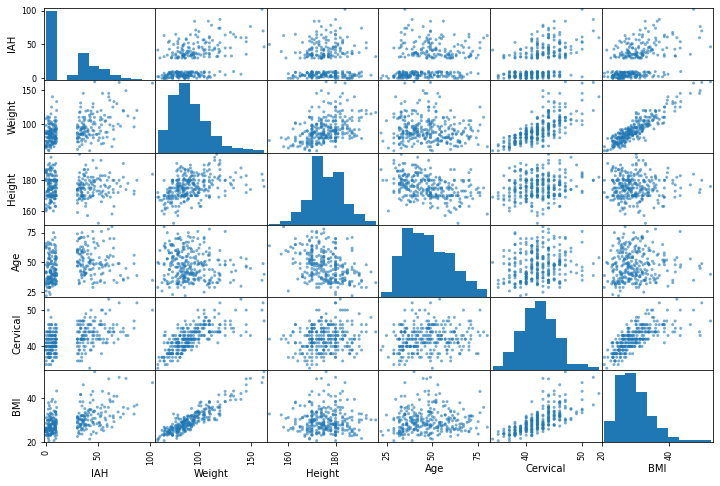

In [9]:
# import the scatter_matrix functionality
from pandas.plotting import scatter_matrix
axes = scatter_matrix(df_OSA_male_extreme, alpha=0.6, figsize=(12, 8), diagonal='hist')

In [10]:
correlation_matrix=df_OSA_male_extreme.corr()
correlation_matrix

,IAH,Weight,Height,Age,Cervical,BMI
IAH,1.000000,0.467838,0.008166,0.215547,0.482166,0.501019
Weight,0.467838,1.000000,0.407919,-0.110927,0.730547,0.908263
Height,0.008166,0.407919,1.000000,-0.373186,0.179531,-0.006009
Age,0.215547,-0.110927,-0.373186,1.000000,0.169440,0.049667
Cervical,0.482166,0.730547,0.179531,0.169440,1.000000,0.716183
BMI,0.501019,0.908263,-0.006009,0.049667,0.716183,1.000000


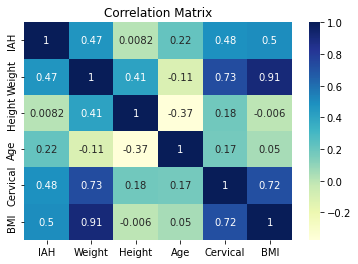

In [11]:
import seaborn as sns
# Plotting the Confusion Matrix
ax = plt.axes()
sns.heatmap(correlation_matrix,annot=True, 
            cmap="YlGnBu",
            )

ax.set_title('Correlation Matrix')
plt.show()

In [12]:
### Picking predictor columns

# Get all the columns from the dataframe.
columns = df_OSA_male_extreme.columns.tolist()

# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["Patient","Gender","IAH","OSA","Height"]]

# Store the variable we'll be predicting on.
target = "IAH"

print('Predictors: ',columns)

Predictors:  ['Weight', 'Age', 'Cervical', 'BMI']


In [13]:
## We will use data (our features) as Numpy arrays
import numpy as np

X = np.array(df_OSA_male_extreme[columns])
X.shape

(278, 4)

In [14]:
print(X[0:4])

[[ 80.          32.          40.          26.7299275 ]
 [109.          32.          42.          30.19390582]
 [ 86.          39.          42.          30.11099051]
 [145.          47.          44.          49.01297999]]


In [15]:
### The outcome "y" will be the Apnea Index (IAH)
y = np.array(df_OSA_male_extreme['IAH'])

In [22]:
import math
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results_MAE = list()
outer_results_MSE = list()
outer_results_RMSE = list()
outer_results_R2 = list()
for train_ix, test_ix in cv_outer.split(X):
	# split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
	model = RandomForestRegressor(random_state=1)
	# define search space
	space = dict()
	space['n_estimators'] = [100, 250, 500, 600]
	space['max_features'] = [2, 3, 4]
	# define search
	search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(X_train, y_train)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_test)
	# evaluate the model
	MAE = mean_absolute_error(y_test, yhat)
	MSE = mean_squared_error(y_test, yhat)
	RMSE = math.sqrt(MSE)
	R2 = r2_score(y_test, yhat)    
	# store the result
	outer_results_MAE.append(MAE)
	outer_results_MSE.append(MSE)
	outer_results_RMSE.append(RMSE)
	outer_results_R2.append(R2)    
	# report progress
	print('>MAE=%.3f, est=%.3f, cfg=%s' % (MAE, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Performace in MAE: %.3f (%.3f)' % (mean(outer_results_MAE), std(outer_results_MAE)))
print('Performace in MSE: %.3f (%.3f)' % (mean(outer_results_MSE), std(outer_results_MSE)))
print('Performace in RMSE: %.3f (%.3f)' % (mean(outer_results_RMSE), std(outer_results_RMSE)))
print('Performace in R2: %.3f (%.3f)' % (mean(outer_results_R2), std(outer_results_R2)))

>MAE=15.933, est=-14.396, cfg={'max_features': 4, 'n_estimators': 250}
>MAE=14.335, est=-15.863, cfg={'max_features': 2, 'n_estimators': 250}
>MAE=15.654, est=-15.144, cfg={'max_features': 2, 'n_estimators': 250}
>MAE=15.870, est=-14.296, cfg={'max_features': 4, 'n_estimators': 250}
>MAE=18.658, est=-15.346, cfg={'max_features': 2, 'n_estimators': 250}
>MAE=12.175, est=-16.013, cfg={'max_features': 2, 'n_estimators': 250}
>MAE=14.312, est=-15.676, cfg={'max_features': 2, 'n_estimators': 250}
>MAE=15.345, est=-14.838, cfg={'max_features': 2, 'n_estimators': 100}
>MAE=13.218, est=-16.277, cfg={'max_features': 2, 'n_estimators': 250}
>MAE=13.982, est=-15.703, cfg={'max_features': 4, 'n_estimators': 100}
Performace in MAE: 14.948 (1.692)
Performace in MSE: 371.526 (75.804)
Performace in RMSE: 19.176 (1.951)
Performace in R2: 0.247 (0.156)


In [17]:
space

{'n_estimators': [100, 250, 500, 600], 'max_features': [2, 3, 4]}

In [18]:
# TRY XGBoost

In [19]:
! pip install xgboost

In [20]:
from xgboost import XGBRegressor

In [23]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results_MAE = list()
outer_results_MSE = list()
outer_results_RMSE = list()
outer_results_R2 = list()
for train_ix, test_ix in cv_outer.split(X):
	# split data
  X_train, X_test = X[train_ix, :], X[test_ix, :]
  y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
  cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
  model = XGBRegressor(objective ='reg:squarederror',random_state=1)
	# define search space
  space = dict()
  space['n_estimators'] = [100, 250, 500, 600]
  space['learning_rate'] = [0.01, 0.05, 0.1, 0.3]
  space['max_depth'] = [2, 3, 5, 6]
  
  # define search
  search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', cv=cv_inner, refit=True)
	# execute search
  result = search.fit(X_train, y_train)
	
  # get the best performing model fit on the whole training set
  best_model = result.best_estimator_
	# evaluate model on the hold out dataset
  yhat = best_model.predict(X_test)
	# evaluate the model
  MAE = mean_absolute_error(y_test, yhat)
  MSE = mean_squared_error(y_test, yhat)
  RMSE = math.sqrt(MSE)
  R2 = r2_score(y_test, yhat)
	# store the result
  outer_results_MAE.append(MAE)
  outer_results_MSE.append(MSE)
  outer_results_RMSE.append(RMSE)
  outer_results_R2.append(R2)    
	# report progress
  print('>MAE=%.3f, est=%.3f, cfg=%s' % (MAE, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Performace in MAE: %.3f (%.3f)' % (mean(outer_results_MAE), std(outer_results_MAE)))
print('Performace in MSE: %.3f (%.3f)' % (mean(outer_results_MSE), std(outer_results_MSE)))
print('Performace in RMSE: %.3f (%.3f)' % (mean(outer_results_RMSE), std(outer_results_RMSE)))
print('Performace in R2: %.3f (%.3f)' % (mean(outer_results_R2), std(outer_results_R2)))

>MAE=16.027, est=-14.294, cfg={'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 250}
>MAE=15.116, est=-16.191, cfg={'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
>MAE=17.900, est=-15.209, cfg={'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
>MAE=15.344, est=-14.557, cfg={'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
>MAE=17.785, est=-15.573, cfg={'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 250}
>MAE=12.662, est=-16.298, cfg={'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
>MAE=14.260, est=-15.846, cfg={'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
>MAE=16.162, est=-15.232, cfg={'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 250}
>MAE=14.361, est=-16.538, cfg={'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
>MAE=12.291, est=-15.776, cfg={'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100}
Performace in MAE: 15.191 (1.792)
Performace in MSE: 384.621 (85.983)
Performace in RMSE: 

In [24]:
from sklearn.svm import SVR

# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results_MAE = list()
outer_results_MSE = list()
outer_results_RMSE = list()
outer_results_R2 = list()
for train_ix, test_ix in cv_outer.split(X):
	# split data
  X_train, X_test = X[train_ix, :], X[test_ix, :]
  y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
  cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
  
  model = SVR()
	# define search space
  space = dict()
  space['C'] = [0.1, 1, 10, 100, 1000]
  space['kernel'] = ['rbf', 'linear']
  space['gamma'] = [1, 0.1, 0.01, 0.001, 0.0001]

  # define search
  search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', cv=cv_inner, refit=True)
	# execute search
  result = search.fit(X_train, y_train)
	
  # get the best performing model fit on the whole training set
  best_model = result.best_estimator_
	# evaluate model on the hold out dataset
  yhat = best_model.predict(X_test)
	# evaluate the model
  MAE = mean_absolute_error(y_test, yhat)
  MSE = mean_squared_error(y_test, yhat)
  RMSE = math.sqrt(MSE)
  R2 = r2_score(y_test, yhat)
	# store the result
  outer_results_MAE.append(MAE)
  outer_results_MSE.append(MSE)
  outer_results_RMSE.append(RMSE)
  outer_results_R2.append(R2)
	# report progress
  print('>MAE=%.3f, est=%.3f, cfg=%s' % (MAE, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Performace in MAE: %.3f (%.3f)' % (mean(outer_results_MAE), std(outer_results_MAE)))
print('Performace in MSE: %.3f (%.3f)' % (mean(outer_results_MSE), std(outer_results_MSE)))
print('Performace in RMSE: %.3f (%.3f)' % (mean(outer_results_RMSE), std(outer_results_RMSE)))
print('Performace in R2: %.3f (%.3f)' % (mean(outer_results_R2), std(outer_results_R2)))

>MAE=16.777, est=-14.587, cfg={'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
>MAE=16.000, est=-15.436, cfg={'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
>MAE=16.958, est=-15.401, cfg={'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
>MAE=14.745, est=-14.727, cfg={'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
>MAE=17.824, est=-15.265, cfg={'C': 100, 'gamma': 1, 'kernel': 'linear'}
>MAE=11.826, est=-15.731, cfg={'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
>MAE=14.955, est=-15.328, cfg={'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
>MAE=15.649, est=-14.970, cfg={'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
>MAE=13.669, est=-16.010, cfg={'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
>MAE=17.048, est=-15.215, cfg={'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Performace in MAE: 15.545 (1.718)
Performace in MSE: 402.645 (80.405)
Performace in RMSE: 19.964 (2.023)
Performace in R2: 0.183 (0.179)


In [25]:
# The Lasso Linear Regression

In [34]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results_MAE = list()
outer_results_MSE = list()
outer_results_RMSE = list()
outer_results_R2 = list()
for train_ix, test_ix in cv_outer.split(X):
	# split data
  X_train, X_test = X[train_ix, :], X[test_ix, :]
  y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
  cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
  model = make_pipeline(StandardScaler(with_mean=False), Lasso())

	# define search space
  space = dict()

  space['lasso__alpha']= [0.005, 0.01, 0.015, 0.02, 0.03]

  
  # define search
  search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', cv=cv_inner, refit=True)
	# execute search
  result = search.fit(X_train, y_train)
	
  # get the best performing model fit on the whole training set
  best_model = result.best_estimator_
	# evaluate model on the hold out dataset
  yhat = best_model.predict(X_test)
	# evaluate the model
  MAE = mean_absolute_error(y_test, yhat)
  MSE = mean_squared_error(y_test, yhat)
  RMSE = math.sqrt(MSE)
  R2 = r2_score(y_test, yhat)
	# store the result
  outer_results_MAE.append(MAE)
  outer_results_MSE.append(MSE)
  outer_results_RMSE.append(RMSE)
  outer_results_R2.append(R2)
	# report progress
  print('>MAE=%.3f, est=%.3f, cfg=%s' % (MAE, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Performace in MAE: %.3f (%.3f)' % (mean(outer_results_MAE), std(outer_results_MAE)))
print('Performace in MSE: %.3f (%.3f)' % (mean(outer_results_MSE), std(outer_results_MSE)))
print('Performace in RMSE: %.3f (%.3f)' % (mean(outer_results_RMSE), std(outer_results_RMSE)))
print('Performace in R2: %.3f (%.3f)' % (mean(outer_results_R2), std(outer_results_R2)))

>MAE=17.123, est=-15.272, cfg={'lasso__alpha': 0.005}
>MAE=16.897, est=-15.617, cfg={'lasso__alpha': 0.005}
>MAE=17.889, est=-15.619, cfg={'lasso__alpha': 0.005}
>MAE=15.553, est=-15.441, cfg={'lasso__alpha': 0.005}
>MAE=18.146, est=-15.634, cfg={'lasso__alpha': 0.005}
>MAE=12.373, est=-16.380, cfg={'lasso__alpha': 0.005}
>MAE=13.920, est=-16.227, cfg={'lasso__alpha': 0.005}
>MAE=14.584, est=-15.770, cfg={'lasso__alpha': 0.005}
>MAE=13.976, est=-16.834, cfg={'lasso__alpha': 0.03}
>MAE=15.609, est=-15.889, cfg={'lasso__alpha': 0.005}
Performace in MAE: 15.607 (1.806)
Performace in MSE: 364.518 (77.088)
Performace in RMSE: 18.982 (2.052)
Performace in R2: 0.272 (0.103)


In [27]:
space

{'lasso__alpha': [0.005, 0.01, 0.015, 0.02, 0.03]}

In [28]:
# Training and tuning a Decission Tree

In [29]:
from sklearn.tree import DecisionTreeRegressor 

# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results_MAE = list()
outer_results_MSE = list()
outer_results_RMSE = list()
outer_results_R2 = list()
for train_ix, test_ix in cv_outer.split(X):
	# split data
  X_train, X_test = X[train_ix, :], X[test_ix, :]
  y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
  cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
  model = DecisionTreeRegressor(random_state=1)
	# define search space
  space = dict()
  space['max_leaf_nodes'] = list(range(2, 100))
  space['min_samples_split'] = [2, 3, 4]

    
  # define search
  search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', cv=cv_inner, refit=True)
	# execute search
  result = search.fit(X_train, y_train)
	
  # get the best performing model fit on the whole training set
  best_model = result.best_estimator_
	# evaluate model on the hold out dataset
  yhat = best_model.predict(X_test)
	# evaluate the model
  MAE = mean_absolute_error(y_test, yhat)
  MSE = mean_squared_error(y_test, yhat)
  RMSE = math.sqrt(MSE)
  R2 = r2_score(y_test, yhat)

	# store the result
  outer_results_MAE.append(MAE)
  outer_results_MSE.append(MSE)
  outer_results_RMSE.append(RMSE)
  outer_results_R2.append(R2)
	# report progress
  print('>MAE=%.3f, est=%.3f, cfg=%s' % (MAE, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Performace in MAE: %.3f (%.3f)' % (mean(outer_results_MAE), std(outer_results_MAE)))
print('Performace in MSE: %.3f (%.3f)' % (mean(outer_results_MSE), std(outer_results_MSE)))
print('Performace in RMSE: %.3f (%.3f)' % (mean(outer_results_RMSE), std(outer_results_RMSE)))
print('Performace in R2: %.3f (%.3f)' % (mean(outer_results_R2), std(outer_results_R2)))

>MAE=18.629, est=-14.983, cfg={'max_leaf_nodes': 21, 'min_samples_split': 2}
>MAE=15.240, est=-16.793, cfg={'max_leaf_nodes': 18, 'min_samples_split': 3}
>MAE=16.974, est=-15.353, cfg={'max_leaf_nodes': 8, 'min_samples_split': 2}
>MAE=15.029, est=-14.744, cfg={'max_leaf_nodes': 8, 'min_samples_split': 2}
>MAE=22.677, est=-16.092, cfg={'max_leaf_nodes': 4, 'min_samples_split': 2}
>MAE=14.083, est=-17.065, cfg={'max_leaf_nodes': 8, 'min_samples_split': 2}
>MAE=12.851, est=-16.290, cfg={'max_leaf_nodes': 13, 'min_samples_split': 2}
>MAE=12.035, est=-16.087, cfg={'max_leaf_nodes': 10, 'min_samples_split': 2}
>MAE=16.954, est=-16.480, cfg={'max_leaf_nodes': 4, 'min_samples_split': 2}
>MAE=14.686, est=-16.335, cfg={'max_leaf_nodes': 34, 'min_samples_split': 3}
Performace in MAE: 15.916 (2.930)
Performace in MSE: 422.531 (128.878)
Performace in RMSE: 20.315 (3.139)
Performace in R2: 0.160 (0.212)


In [30]:
# Train a tree with "best hyperparameters" using all data


In [31]:
clf = DecisionTreeRegressor(max_leaf_nodes = 13, min_samples_split = 2, random_state=1)

model = clf.fit(X, y)

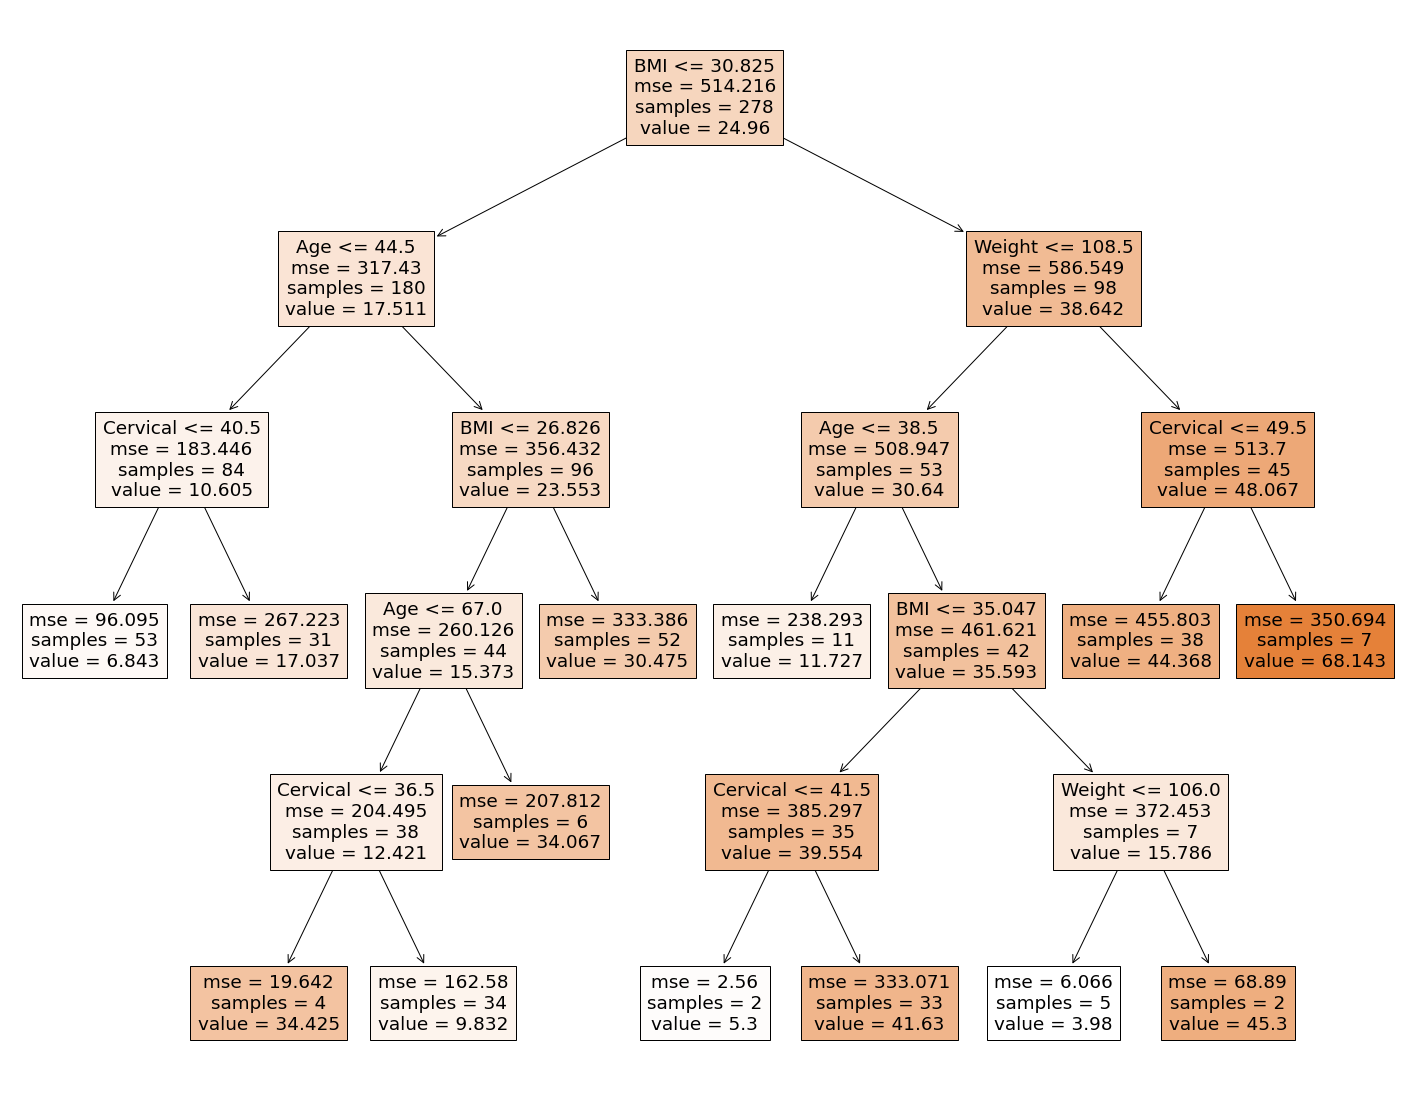

In [32]:
# Visualisation of the tree
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names = columns,
                   filled=True)
